In [1]:
import pandas as pd
df = pd.read_csv('llcp2021.csv', )

In [4]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1,1,1192021,1,19,2021,1100,2021000001,2021000001,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1,1,1212021,1,21,2021,1100,2021000002,2021000002,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1,1,1212021,1,21,2021,1100,2021000003,2021000003,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,0.0,0.0
3,1,1,1172021,1,17,2021,1100,2021000004,2021000004,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,0.0,0.0
4,1,1,1152021,1,15,2021,1100,2021000005,2021000005,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421817 entries, 0 to 421816
Columns: 303 entries, _STATE to _VEGETE1
dtypes: float64(286), int64(17)
memory usage: 975.1 MB


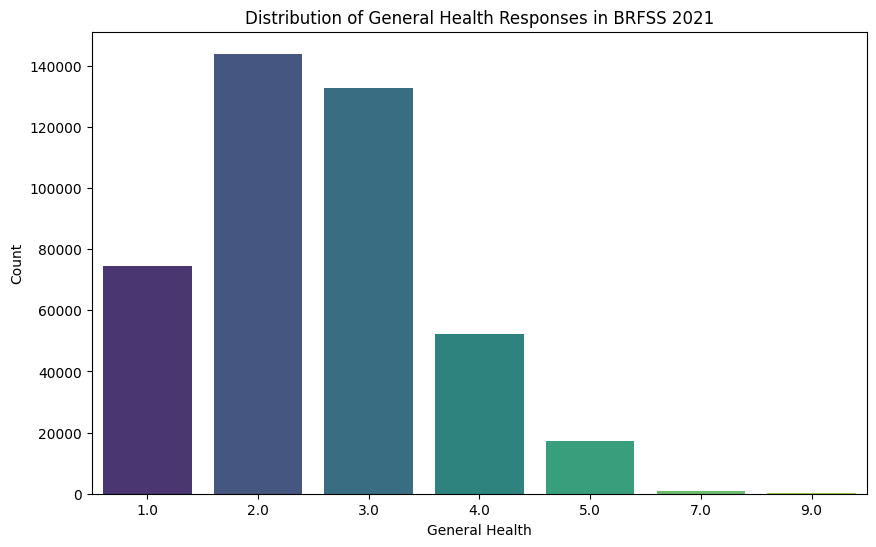

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean up the data. In reality this might be much more complex
df = df.dropna(subset=['GENHLTH'])

# Count the number of occurrences of each health status
health_counts = df['GENHLTH'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=health_counts.index, y=health_counts.values, palette="viridis")
plt.title('Distribution of General Health Responses in BRFSS 2021')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.show()

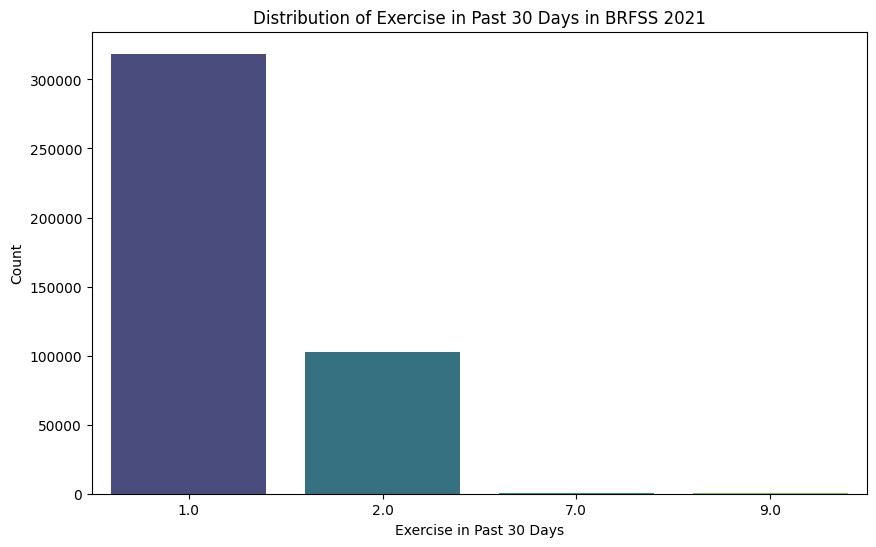

In [13]:
# Clean up the data. In reality this might be much more complex
df = df.dropna(subset=['EXERANY2'])

# Count the number of occurrences of each health status
exer_counts = df['EXERANY2'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=exer_counts.index, y=exer_counts.values, palette="viridis")
plt.title('Distribution of Exercise in Past 30 Days in BRFSS 2021')
plt.xlabel('Exercise in Past 30 Days')
plt.ylabel('Count')
plt.show()

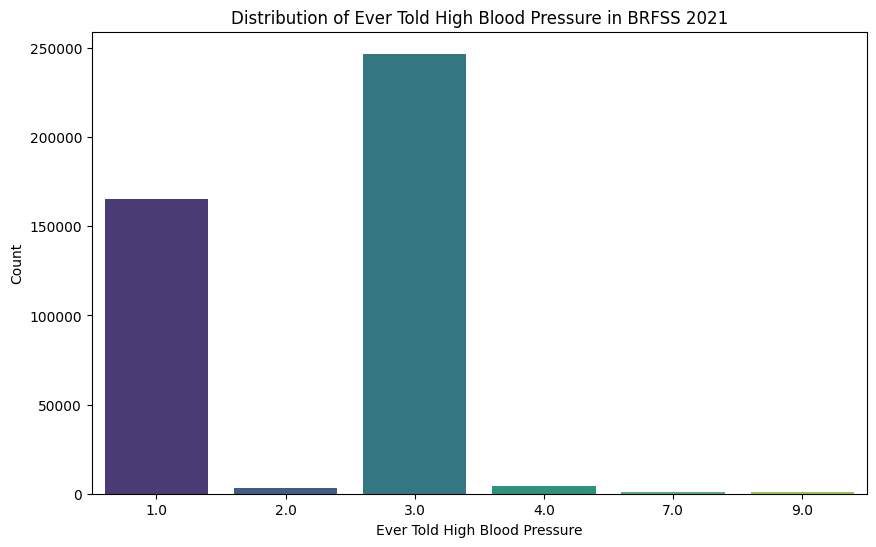

In [16]:
# Clean up the data. In reality this might be much more complex
df = df.dropna(subset=['BPHIGH6'])

# Count the number of occurrences of each health status
bph_counts = df['BPHIGH6'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=bph_counts.index, y=bph_counts.values, palette="viridis")
plt.title('Distribution of Ever Told High Blood Pressure in BRFSS 2021')
plt.xlabel('Ever Told High Blood Pressure')
plt.ylabel('Count')
plt.show()

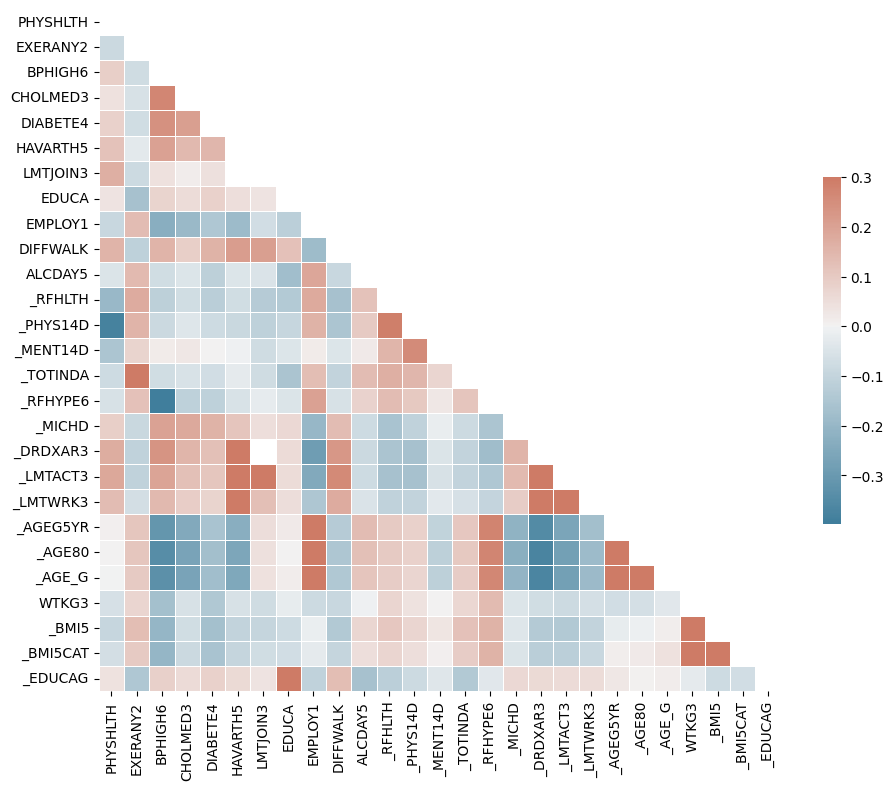

In [22]:
import numpy as np
# Select variables of interest
selected_vars = df[['PHYSHLTH', 'EXERANY2', 'BPHIGH6', 'CHOLMED3', 'DIABETE4', 'HAVARTH5',
                                                    'LMTJOIN3', 'EDUCA', 'EMPLOY1', 'DIFFWALK', 'ALCDAY5', '_RFHLTH',
                                                    '_PHYS14D', '_MENT14D', '_TOTINDA', '_RFHYPE6', '_MICHD', '_DRDXAR3',
                                                    '_LMTACT3', '_LMTWRK3', '_AGEG5YR', '_AGE80', '_AGE_G', 'WTKG3',
                                                    '_BMI5', '_BMI5CAT', '_EDUCAG']]

# Compute the correlation matrix for selected variables
corr = selected_vars.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

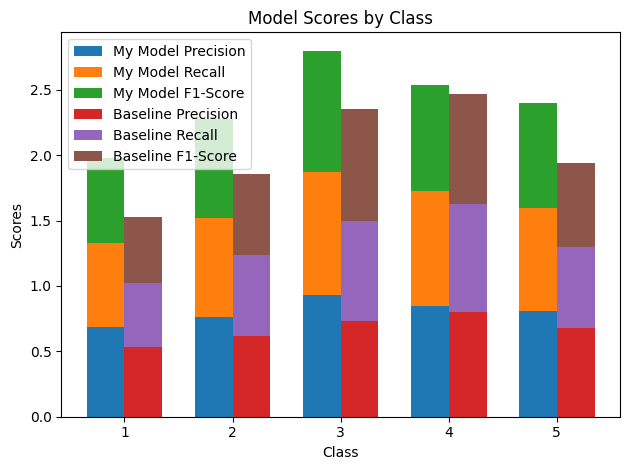

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating DataFrame for My Model
data1 = {
    'Class': [1, 2, 3, 4, 5],
    'Precision': [0.69, 0.76, 0.93, 0.85, 0.81],
    'Recall': [0.64, 0.76, 0.94, 0.88, 0.79],
    'F1-Score': [0.65, 0.76, 0.93, 0.81, 0.80]
}
df1 = pd.DataFrame(data1)

# Creating DataFrame for Baseline Model
data2 = {
    'Class': [1, 2, 3, 4, 5],
    'Precision': [0.53, 0.62, 0.73, 0.80, 0.68],
    'Recall': [0.49, 0.62, 0.77, 0.83, 0.62],
    'F1-Score': [0.51, 0.62, 0.85, 0.84, 0.64]
}
df2 = pd.DataFrame(data2)

# Plotting
labels = df1['Class']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

# Adding bars for My Model
rects1 = ax.bar(x - width/2, df1['Precision'], width, label='My Model Precision')
rects2 = ax.bar(x - width/2, df1['Recall'], width, bottom=df1['Precision'], label='My Model Recall')
rects3 = ax.bar(x - width/2, df1['F1-Score'], width, bottom=df1['Precision']+df1['Recall'], label='My Model F1-Score')

# Adding bars for Baseline Model
rects4 = ax.bar(x + width/2, df2['Precision'], width, label='Baseline Precision')
rects5 = ax.bar(x + width/2, df2['Recall'], width, bottom=df2['Precision'], label='Baseline Recall')
rects6 = ax.bar(x + width/2, df2['F1-Score'], width, bottom=df2['Precision']+df2['Recall'], label='Baseline F1-Score')

ax.set_ylabel('Scores')
ax.set_xlabel('Class')
ax.set_title('Model Scores by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


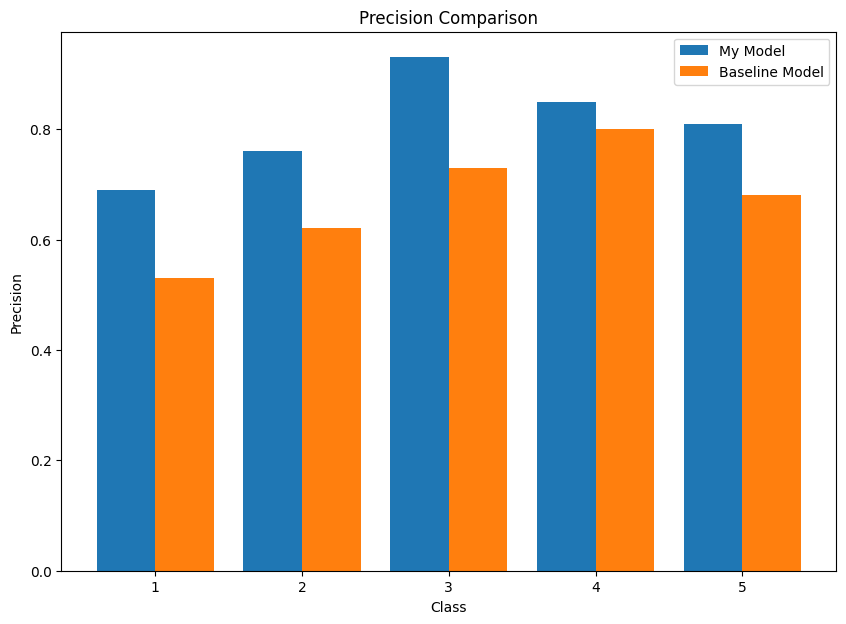

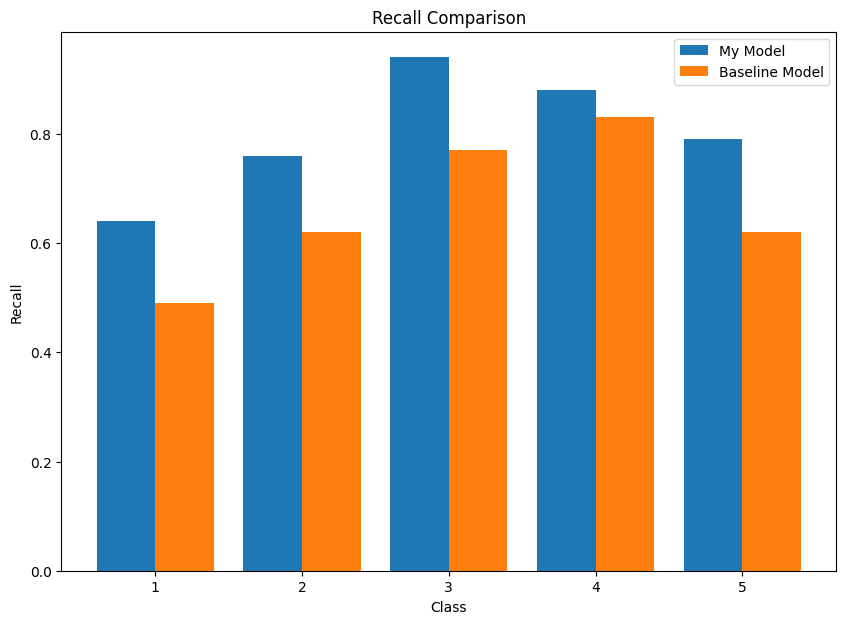

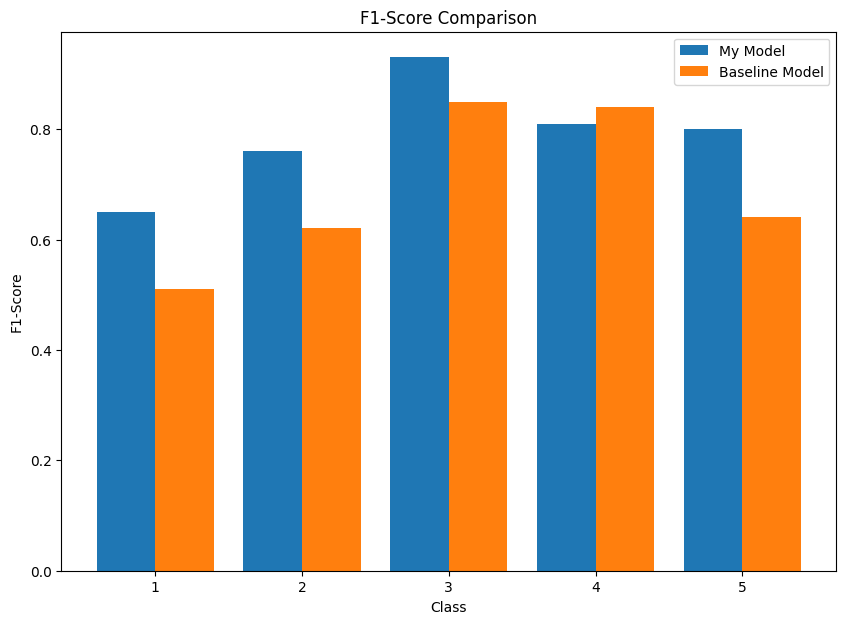

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating DataFrame for My Model
data1 = {
    'Class': [1, 2, 3, 4, 5],
    'Precision': [0.69, 0.76, 0.93, 0.85, 0.81],
    'Recall': [0.64, 0.76, 0.94, 0.88, 0.79],
    'F1-Score': [0.65, 0.76, 0.93, 0.81, 0.80]
}
df1 = pd.DataFrame(data1)

# Creating DataFrame for Baseline Model
data2 = {
    'Class': [1, 2, 3, 4, 5],
    'Precision': [0.53, 0.62, 0.73, 0.80, 0.68],
    'Recall': [0.49, 0.62, 0.77, 0.83, 0.62],
    'F1-Score': [0.51, 0.62, 0.85, 0.84, 0.64]
}
df2 = pd.DataFrame(data2)

# Precision
plt.figure(figsize=[10,7])
plt.bar(df1['Class']-0.2, df1['Precision'], width=0.4, label='My Model')
plt.bar(df2['Class']+0.2, df2['Precision'], width=0.4, label='Baseline Model')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.legend()
plt.show()

# Recall
plt.figure(figsize=[10,7])
plt.bar(df1['Class']-0.2, df1['Recall'], width=0.4, label='My Model')
plt.bar(df2['Class']+0.2, df2['Recall'], width=0.4, label='Baseline Model')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.legend()
plt.show()

# F1-Score
plt.figure(figsize=[10,7])
plt.bar(df1['Class']-0.2, df1['F1-Score'], width=0.4, label='My Model')
plt.bar(df2['Class']+0.2, df2['F1-Score'], width=0.4, label='Baseline Model')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.legend()
plt.show()
